# Keras - Neural Network regression 

### Exercise 11.1
#### Linear fit

$$
f(x)=2x+1
$$

In [145]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

In [170]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

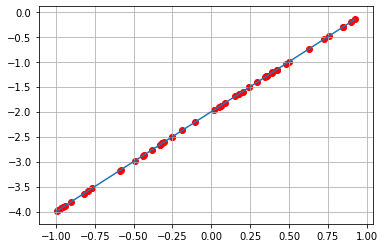

In [171]:
# plot training and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); plt.show()

In [172]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [173]:
# get a summary of our composed model
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [174]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
16/16 [==============================] - 0s 19ms/step - loss: 6.1781 - mse: 6.1781 - val_loss: 5.0653 - val_mse: 5.0653
Epoch 2/30
16/16 [==============================] - 0s 6ms/step - loss: 4.0835 - mse: 4.0835 - val_loss: 3.4017 - val_mse: 3.4017
Epoch 3/30
16/16 [==============================] - 0s 10ms/step - loss: 2.8202 - mse: 2.8202 - val_loss: 2.3833 - val_mse: 2.3833
Epoch 4/30
16/16 [==============================] - 0s 17ms/step - loss: 2.0298 - mse: 2.0298 - val_loss: 1.7260 - val_mse: 1.7260
Epoch 5/30
16/16 [==============================] - 0s 8ms/step - loss: 1.5065 - mse: 1.5065 - val_loss: 1.2839 - val_mse: 1.2839
Epoch 6/30
16/16 [==============================] - 0s 9ms/step - loss: 1.1449 - mse: 1.1449 - val_loss: 0.9770 - val_mse: 0.9770
Epoch 7/30
16/16 [==============================] - 0s 7ms/step - loss: 0.8860 - mse: 0.8860 - val_loss: 0.7535 - val_mse: 0.7535
Epoch 8/30
16/16 [==============================] - 0s 9ms/step - loss: 0.6932 - mse: 0

In [175]:
# return weights
model.get_weights()

[array([[1.8809857]], dtype=float32), array([-2.0011487], dtype=float32)]

In [176]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 5ms/step - loss: 0.0045 - mse: 0.0045

Test loss: 0.004505358636379242
Test accuracy: 0.004505358636379242


In [177]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 3ms/step - loss: 0.0045 - mse: 0.0045

Test loss: 0.004505358636379242
Test accuracy: 0.004505358636379242


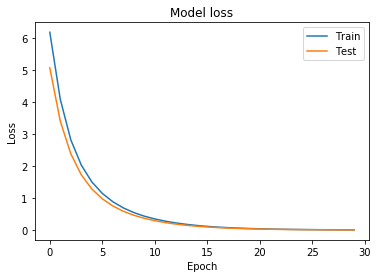

In [178]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

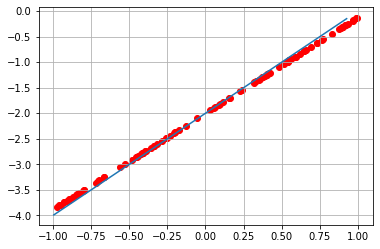

In [179]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

È stato sufficiente incrementare il data training ad $N_{train} = 500$ per migliorare nettamente le prestazioni.

### Exercise 11.2

#### Polinomial Fit

$$
f(x)=4-3x-2x^2+3x^3
$$
per $x \in [-1,1]$.

In [3]:
# target parameters of f(x) = a x^3 + b x^2 + c x + d
a = 3  # coefficient o(x^3)
b = -2 # coefficient o(x^2)
c = -3 # coefficient o(x)
d = 4  # costant

Now let's generate a set of input data which will slightly deviate from our ideal behaviour using a random noise (that actually is set to zero):

In [4]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 10000)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = a * x_valid**3 + b * x_valid**2 + c * x_valid + d # ideal (target) function

sigma = 0.0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(a * x_train**3 + b * x_train**2 + c * x_train + d, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(a * x_valid**3 + b * x_valid**2 + c * x_valid + d, sigma)

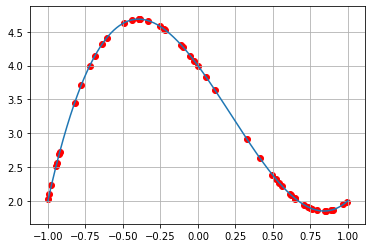

In [5]:
# plot training and target dataset
import matplotlib.pyplot as plt
x = np.linspace(-1,1,1000)
plt.plot( x, a * x**3 + b * x**2 + c * x + d)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); plt.show()

In [6]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(2, input_shape=(1,)))
model.add(Dense(200, activation='relu'))
model.add(Dense(132, activation='relu'))
model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [7]:
# get a summary of our composed model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 4         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               600       
_________________________________________________________________
dense_2 (Dense)              (None, 132)               26532     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 133       
Total params: 27,269
Trainable params: 27,269
Non-trainable params: 0
_________________________________________________________________


In [8]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=200, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
50/50 [==============================] - 1s 24ms/step - loss: 2.5711 - mse: 2.5711 - val_loss: 1.0072 - val_mse: 1.0072
Epoch 2/30
50/50 [==============================] - 0s 6ms/step - loss: 0.5101 - mse: 0.5101 - val_loss: 0.6970 - val_mse: 0.6970
Epoch 3/30
50/50 [==============================] - 0s 7ms/step - loss: 0.3387 - mse: 0.3387 - val_loss: 0.4648 - val_mse: 0.4648
Epoch 4/30
50/50 [==============================] - 0s 7ms/step - loss: 0.2363 - mse: 0.2363 - val_loss: 0.3479 - val_mse: 0.3479
Epoch 5/30
50/50 [==============================] - 0s 6ms/step - loss: 0.1667 - mse: 0.1667 - val_loss: 0.2369 - val_mse: 0.2369
Epoch 6/30
50/50 [==============================] - 0s 8ms/step - loss: 0.1159 - mse: 0.1159 - val_loss: 0.1693 - val_mse: 0.1693
Epoch 7/30
50/50 [==============================] - 0s 9ms/step - loss: 0.0820 - mse: 0.0820 - val_loss: 0.1308 - val_mse: 0.1308
Epoch 8/30
50/50 [==============================] - 0s 7ms/step - loss: 0.0595 - mse: 0.0

In [9]:
# return weights
model.get_weights()

[array([[-1.4536266,  1.5371491]], dtype=float32),
 array([-0.05286187,  0.3323697 ], dtype=float32),
 array([[-1.61644667e-01,  1.93128675e-01, -4.49053012e-02,
         -1.36099055e-01, -1.50598571e-01, -8.50232914e-02,
         -1.46618485e-01,  6.61770627e-02, -3.52741405e-02,
         -1.67681295e-02, -3.12618650e-02, -1.63448304e-01,
         -1.73307583e-01, -1.41492069e-01, -2.92672254e-02,
          1.70989305e-01,  1.74362227e-01, -1.73797876e-01,
          1.44751817e-01, -3.33018750e-02, -1.21782385e-02,
          7.86790922e-02, -4.26414795e-03, -7.44089633e-02,
         -9.52815264e-02,  3.86806503e-02, -6.00112751e-02,
         -1.54559419e-01, -3.62119153e-02,  1.17504373e-01,
         -1.72721118e-01,  1.18334308e-01, -2.91676819e-02,
         -6.16845069e-03, -1.53751239e-01,  9.16172564e-02,
          3.32416035e-02,  4.60886098e-02,  1.05781436e-01,
         -1.74863085e-01, -8.86317641e-02,  2.21276134e-02,
          1.38345301e-01, -1.87773734e-01,  7.91219771e-02

In [10]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 18ms/step - loss: 0.0077 - mse: 0.0077

Test loss: 0.007736627943813801
Test accuracy: 0.007736627943813801


In [11]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 3ms/step - loss: 0.0077 - mse: 0.0077

Test loss: 0.007736627943813801
Test accuracy: 0.007736627943813801


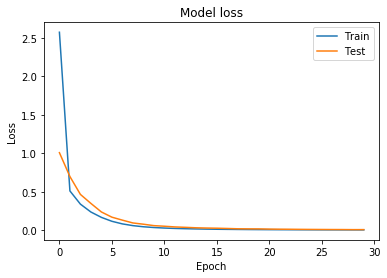

In [12]:
# look into training history
'''
# summarize history for accuracy
plt.plot(history.history['categorical_accuracy'])      #plt.plot(history.history['acc']) #for generic 'accuracy'
plt.plot(history.history['val_categorical_accuracy'])  #plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test/validation'], loc='best')
plt.show()
'''

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

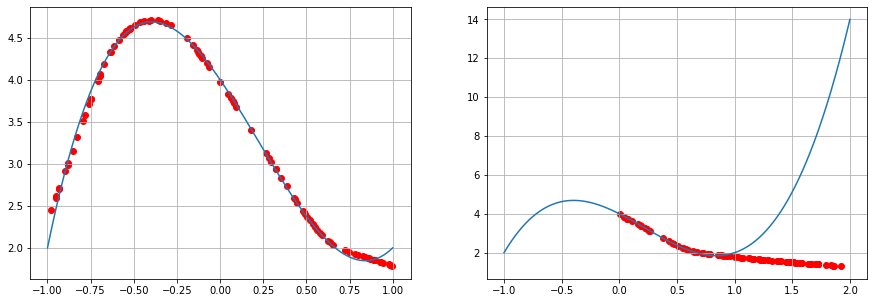

In [18]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

x_p = np.random.uniform(-1, 1, 100)
y_p = model.predict(x_p)

ax.scatter(x_p, y_p,color='r')
ax.plot( x, a * x**3 + b * x**2 + c * x + d)
ax.grid(True)

x_p = np.random.uniform(0, 2, 100)
y_p = model.predict(x_p)
x = np.linspace(-1,2,1000)

ax2.scatter(x_p, y_p,color='r')
ax2.plot( x, a * x**3 + b * x**2 + c * x + d)
ax2.grid(True)

plt.show()

All'interno dell'intervallo di training la rete sembra predirre abbastanza bene la posizione dei punti, tranne agli estremi dell'intervallo, dove questi si discostano leggermente dalla funzione.
Al di fuori dell'intervallo di training la rete non riesce minimamente a predirre i punti correttamente.

### Exercise 11.3
#### Trigonometric 2D function fit
  
$$
f(x,y) = \sin(x^2+y^2)
$$
nel range $x \in [-3/2,3/2]$ e $y \in [-3/2,3/2]$.

In [294]:
# target parameters of f(x) = a x^3 + b x^2 + c x + d
a = 1  # coefficient sin
b = 1 # coefficient x^2
c = 1 # coefficient y^2

In [369]:
import numpy as np
from numpy import sin

n_train = 5000
n_valid = 1000
# generate synthetic training dataset
xy_train = np.zeros((n_train, 2))
# generate synthetic validation data
xy_valid = np.zeros((n_valid, 2))

z_target = np.zeros(n_train)
for i in range(n_train):
    xy_train[i,0] = np.random.uniform(-3/2,3/2)
    xy_train[i,1] = np.random.uniform(-3/2,3/2)
    z_target[i] = a * sin(b * xy_train[i,0]**2 + c * xy_train[i,1]**2) # ideal(target) function

z_valid = np.zeros(n_valid)
for i in range(n_valid):
    xy_valid[i,0] = np.random.uniform(-3/2,3/2)
    xy_valid[i,1] = np.random.uniform(-3/2,3/2)
    z_valid[i] = a * sin(b * xy_valid[i,0]**2 + c * xy_valid[i,1]**2) # ideal(target) function
    


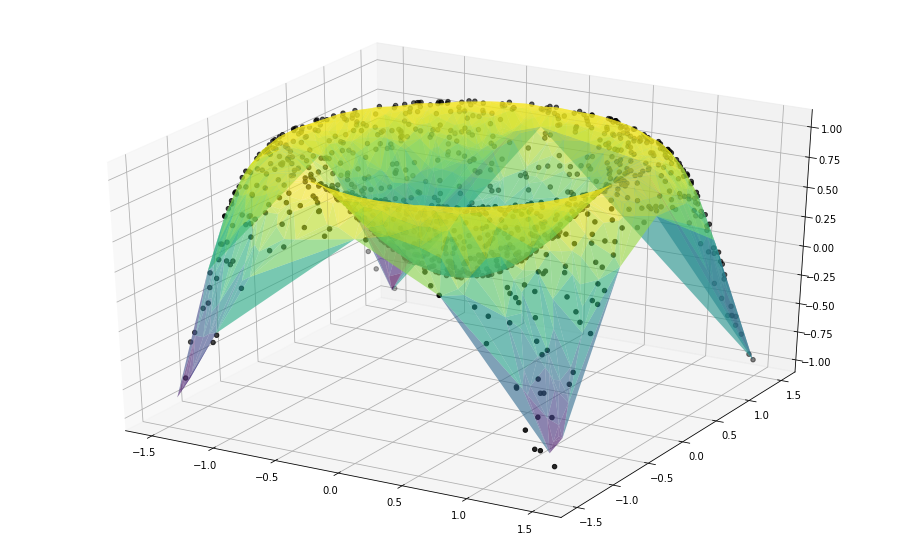

In [365]:
# plot training and target dataset
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(projection='3d')

x = np.random.uniform(-3/2,3/2,1000)
y = np.random.uniform(-3/2,3/2,1000)
z = a * sin( b * x**2 + c * y**2)

ax.plot_trisurf(x, y, z, cmap='viridis', edgecolor='none', alpha = 0.6)
ax.scatter(x_valid, y_valid, a * sin( b * x_valid**2 + c * y_valid**2), c='black')

plt.show()

In [342]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(100, input_shape=(2,), activation='relu'))
model.add(Dense(66, activation='relu'))
model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [336]:
# get a summary of our composed model
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 100)               300       
_________________________________________________________________
dense_58 (Dense)             (None, 66)                6666      
_________________________________________________________________
dense_59 (Dense)             (None, 1)                 67        
Total params: 7,033
Trainable params: 7,033
Non-trainable params: 0
_________________________________________________________________


In [370]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=xy_train, y=z_target,
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(xy_valid, z_valid))

Epoch 1/50
157/157 [==============================] - 1s 5ms/step - loss: 0.1320 - mse: 0.1320 - val_loss: 0.1399 - val_mse: 0.1399
Epoch 2/50
157/157 [==============================] - 1s 4ms/step - loss: 0.1263 - mse: 0.1263 - val_loss: 0.1341 - val_mse: 0.1341
Epoch 3/50
157/157 [==============================] - 0s 3ms/step - loss: 0.1219 - mse: 0.1219 - val_loss: 0.1298 - val_mse: 0.1298
Epoch 4/50
157/157 [==============================] - 1s 3ms/step - loss: 0.1176 - mse: 0.1176 - val_loss: 0.1247 - val_mse: 0.1247
Epoch 5/50
157/157 [==============================] - 1s 4ms/step - loss: 0.1135 - mse: 0.1135 - val_loss: 0.1202 - val_mse: 0.1202
Epoch 6/50
157/157 [==============================] - 1s 5ms/step - loss: 0.1092 - mse: 0.1092 - val_loss: 0.1193 - val_mse: 0.1193
Epoch 7/50
157/157 [==============================] - 1s 4ms/step - loss: 0.1052 - mse: 0.1052 - val_loss: 0.1116 - val_mse: 0.1116
Epoch 8/50
157/157 [==============================] - 1s 5ms/step - loss: 0.

In [371]:
# return weights
model.get_weights()

[array([[-0.11459652, -0.08138997, -0.10606441,  0.13780326, -0.10713321,
         -0.0277071 ,  0.13097222,  0.06300952, -0.10137837, -0.2540949 ,
         -0.24720356, -0.20389384, -0.23349437, -0.05663013, -0.16662045,
          0.07887187, -0.19278295,  0.21849245,  0.3323009 , -0.18815885,
          0.18055227,  0.20241313,  0.04964355, -0.04238494,  0.3094083 ,
          0.00855293, -0.31943807,  0.15601553,  0.33964905,  0.28096268,
          0.00625284, -0.30439577, -0.15609668, -0.17057076,  0.1115516 ,
         -0.19821234,  0.22022456, -0.01893057, -0.02360866, -0.00884473,
          0.11486028,  0.02948901, -0.26292506, -0.07359786,  0.38704222,
          0.05269975,  0.15545619,  0.19217868, -0.26981777, -0.19071972,
          0.16486022, -0.01591205, -0.14255778, -0.16133848, -0.41743484,
          0.07437993, -0.09779868, -0.15882339,  0.14257   , -0.26060662,
          0.20624585, -0.10508474, -0.2638149 , -0.18872076,  0.06646296,
         -0.06392864, -0.05678017, -0.

In [372]:
# evaluate model
score = model.evaluate(xy_valid, z_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

32/32 [==============================] - 0s 4ms/step - loss: 0.0038 - mse: 0.0038

Test loss: 0.003766663372516632
Test accuracy: 0.003766663372516632


In [375]:
# evaluate model with the exact curve
score = model.evaluate(xy_train, z_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

157/157 [==============================] - 0s 3ms/step - loss: 0.0031 - mse: 0.0031

Test loss: 0.0030775126069784164
Test accuracy: 0.0030775126069784164


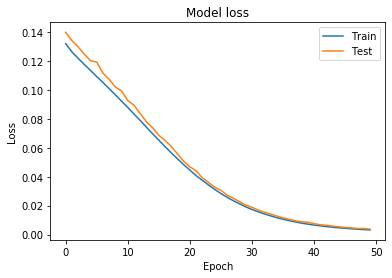

In [384]:
# look into training history

'''
# summarize history for accuracy
plt.plot(history.history['categorical_accuracy'])      #plt.plot(history.history['acc']) #for generic 'accuracy'
plt.plot(history.history['val_accuracy'])  #plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test/validation'], loc='best')
plt.show()
'''

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

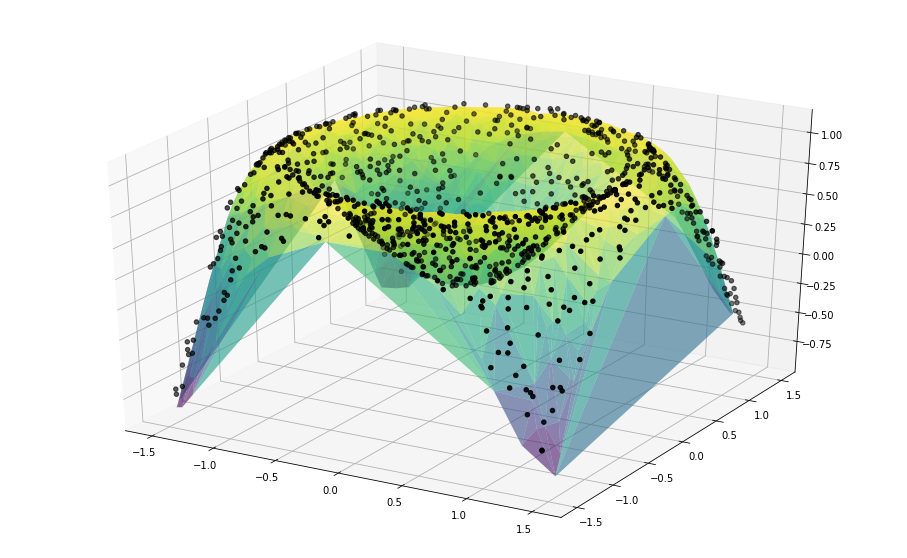

In [378]:
n_test = 1000
xy_test = np.zeros((n_test, 2))
x_p = np.zeros(n_test)
y_p = np.zeros(n_test)
for i in range(n_test):
    xy_test[i,0] = np.random.uniform(-3/2,3/2)
    xy_test[i,1] = np.random.uniform(-3/2,3/2)
    x_p[i] = xy_test[i,0]
    y_p[i] = xy_test[i,1]
    
z_p = model.predict(xy_test)

fig = plt.figure(figsize=(16,10))
ax = fig.gca(projection='3d')

x = np.random.uniform(-3/2,3/2,1000)
y = np.random.uniform(-3/2,3/2,1000)
z = a * sin(b * x**2 + c * y**2)

ax.plot_trisurf(x, y, z, cmap='viridis', edgecolor='none', alpha=0.6)
ax.scatter(x_p, y_p, z_p, c='black')

plt.show()
